** Follow the above steps to find dividends, dividend growth rate, and DCF of 5 stocks in SET50, namely

PTT,
AOT,
KBANK,
CPALL,
ADVANC 


Here, you will use only the data from 2016-01-01 to 2020-12-31 **

# PTT

In [ ]:
import pandas as pd
import pandas_datareader as reader
import numpy as np
import matplotlib.pyplot as plt
apple = reader.DataReader("PTT.bk",
data_source="yahoo", 
start='2016-01-01', # started date 
end='2020-12-31')  # ended date
apple.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-01-04,25.000000,23.799999,24.799999,23.799999,57964000.0,19.659714
2016-01-05,24.100000,22.500000,23.900000,22.700001,88229000.0,18.751074
2016-01-06,22.900000,22.200001,22.500000,22.799999,65320000.0,18.833673
2016-01-07,21.600000,20.600000,21.500000,20.900000,182186000.0,17.264202
2016-01-08,21.700001,20.900000,21.299999,21.500000,108961000.0,17.759827


Text(0, 0.5, 'Difference in Change')

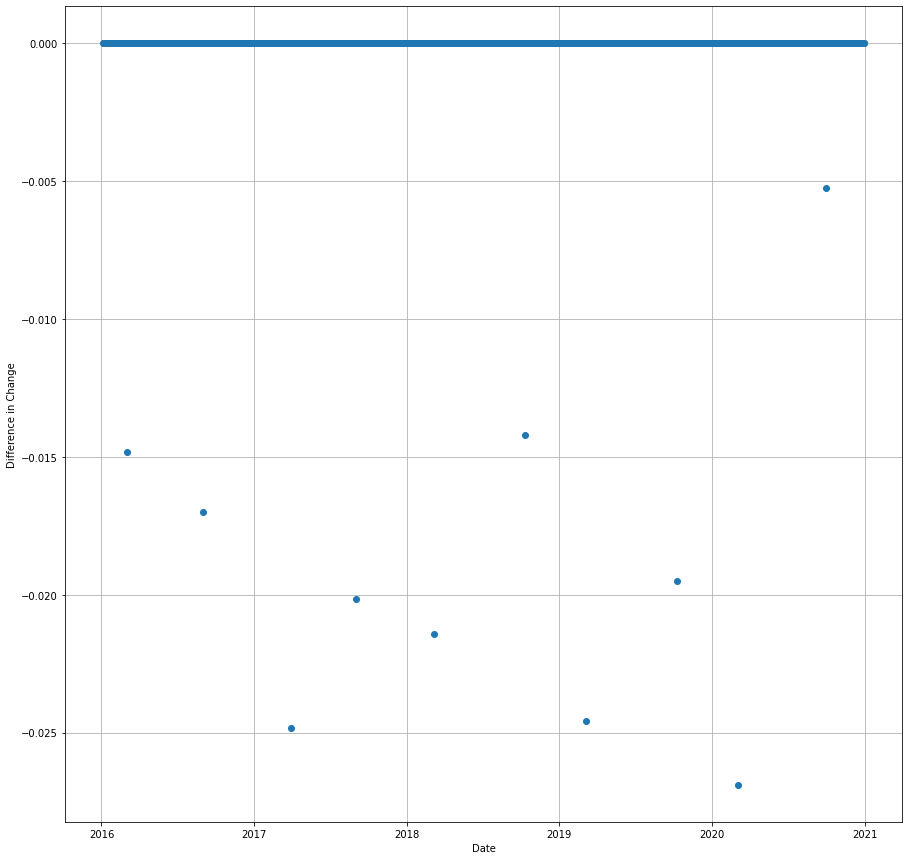

In [ ]:
adj_close = apple['Adj Close'] # adjusted close price
pct_adj_close = adj_close.pct_change(1) # find daily percent changes 
close = apple['Close'] # close price
pct_close = close.pct_change(1) # find daily percent changes 
plt.figure(figsize=(15,15)) # adjusted the size of graph 
plt.plot(pct_close- pct_adj_close, "o") # plot the graph
plt.grid() # create the grid in graph
plt.xlabel("Date") # date for X axis
plt.ylabel("Difference in Change") # difference in cahnge for Y axis 

In [ ]:
delta = pct_close- pct_adj_close # sum of daily percentage changes close price and adjust close price
threshold = -0.001 # We pick threshold = -0.001 from the graph.
delta = delta[delta<threshold] # screen only the location where differences is less than -0.001
print("The dividens are paid out on:")
for date in delta.index:
  print(date.date())

The dividens are paid out on:
2016-03-03
2016-08-31
2017-03-29
2017-08-31
2018-03-06
2018-10-11
2019-03-06
2019-10-10
2020-03-04
2020-09-30


In [ ]:
dividends =[]
for date in delta.index:
  k = np.nonzero(apple.index==date)[0][0] # find the row where dividends have been paid.
  close_before = close[k-1]  # list that assign close k-1 for close_before
  pct_close_div = pct_close[k] 
  pct_adj_div = pct_adj_close[k] 
  dividend = close_before * ( pct_adj_div - pct_close_div)
  dividends.append(dividend)
dividends = pd.Series(dividends, index=delta.index)
print(dividends)

Date
2016-03-03    0.404463
2016-08-31    0.601726
2017-03-29    1.002538
2017-08-31    0.810151
2018-03-06    1.204359
2018-10-11    0.766922
2019-03-06    1.198742
2019-10-10    0.892978
2020-03-04    1.095838
2020-09-30    0.174176
dtype: float64


In [ ]:
yearly_dividends = []
for y in range(2016,2021): # Find dividens growth rate in the last 5 years.
  dividend_year = dividends[dividends.index.year == y] #filter only one year
  yearly_dividends.append(dividend_year.sum()) # find total dividens per year
yearly_dividends = pd.Series(yearly_dividends, index=np.arange(2016,2021))
dividend_growth = yearly_dividends.pct_change(1).dropna()
print("Yearly dividends: ")
print(yearly_dividends)
print("Dividend growth rate: ")
print(dividend_growth)
g = dividend_growth.median()
print(f"Dividends growth rate is {g*100} %.")

Yearly dividends: 
2016    1.006189
2017    1.812689
2018    1.971280
2019    2.091720
2020    1.270014
dtype: float64
Dividend growth rate: 
2017    0.801539
2018    0.087489
2019    0.061097
2020   -0.392837
dtype: float64
Dividends growth rate is 7.4293239795086174 %.


In [ ]:
r = 0.1 # Assume that we can find the risk-free security at 10%
S_apple = yearly_dividends[2020]/(r - g) # D1/(r - g)
print(f"The current apple stock price is {adj_close.iloc[-1]}.") 
print(f"From the Discounted Cash Flow model, Apple Stock price is {S_apple}.")

The current apple stock price is 42.5.
From the Discounted Cash Flow model, Apple Stock price is 49.403885044484056.


#AOT

In [ ]:
import pandas as pd
import pandas_datareader as reader
import numpy as np
import matplotlib.pyplot as plt
apple = reader.DataReader("AOT.bk",
data_source="yahoo", 
start='2016-01-01', # started date 
end='2020-12-31')  # ended date
apple.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-01-04,35.099998,33.900002,34.900002,34.299999,30288000.0,32.061298
2016-01-05,34.500000,33.900002,34.400002,34.000000,31804000.0,31.780874
2016-01-06,34.299999,33.799999,34.000000,34.000000,27878000.0,31.780874
2016-01-07,33.799999,33.299999,33.799999,33.700001,30974000.0,31.500456
2016-01-08,34.099998,33.599998,33.900002,33.799999,27068000.0,31.593922


Text(0, 0.5, 'Difference in Change')

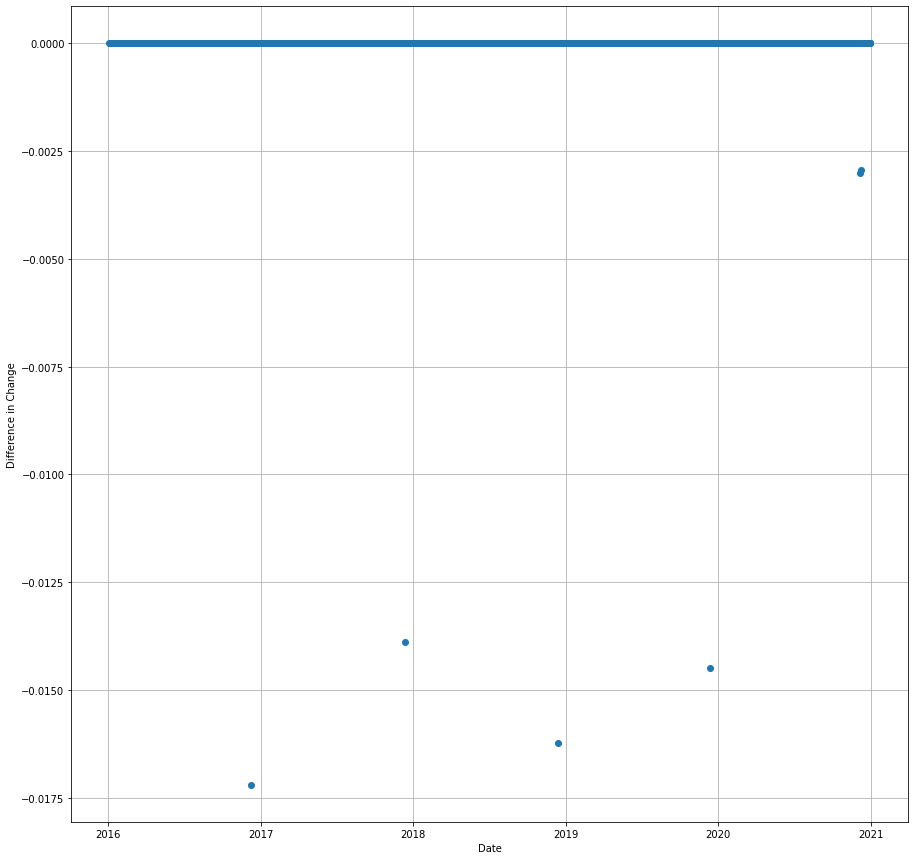

In [ ]:
adj_close = apple['Adj Close'] # adjusted close price
pct_adj_close = adj_close.pct_change(1) # find daily percent changes 
close = apple['Close'] # close price
pct_close = close.pct_change(1) # find daily percent changes 
plt.figure(figsize=(15,15)) # adjusted the size of graph 
plt.plot(pct_close- pct_adj_close, "o") # plot the graph
plt.grid() # create the grid in graph
plt.xlabel("Date") # date for X axis
plt.ylabel("Difference in Change") # difference in cahnge for Y axis 

In [ ]:
delta = pct_close- pct_adj_close # sum of daily percentage changes close price and adjust close price
threshold = -0.001 # We pick threshold = -0.001 from the graph.
delta = delta[delta<threshold] # screen only the location where differences is less than -0.001
print("The dividens are paid out on:")
for date in delta.index:
  print(date.date())

The dividens are paid out on:
2016-12-08
2017-12-12
2018-12-13
2019-12-12
2020-12-04
2020-12-08


In [ ]:
dividends =[]
for date in delta.index:
  k = np.nonzero(apple.index==date)[0][0] # find the row where dividends have been paid.
  close_before = close[k-1]  # list that assign close k-1 for close_before
  pct_close_div = pct_close[k] 
  pct_adj_div = pct_adj_close[k] 
  dividend = close_before * ( pct_adj_div - pct_close_div)
  dividends.append(dividend)
dividends = pd.Series(dividends, index=delta.index)
print(dividends)

Date
2016-12-08    0.687920
2017-12-12    0.868510
2018-12-13    1.046688
2019-12-12    1.079299
2020-12-04    0.194971
2020-12-08    0.194144
dtype: float64


In [ ]:
yearly_dividends = []
for y in range(2016,2021): # Find dividens growth rate in the last 5 years.
  dividend_year = dividends[dividends.index.year == y] #filter only one year
  yearly_dividends.append(dividend_year.sum()) # find total dividens per year
yearly_dividends = pd.Series(yearly_dividends, index=np.arange(2016,2021))
dividend_growth = yearly_dividends.pct_change(1).dropna()
print("Yearly dividends: ")
print(yearly_dividends)
print("Dividend growth rate: ")
print(dividend_growth)
g = dividend_growth.median()
print(f"Dividends growth rate is {g*100} %.")

Yearly dividends: 
2016    0.687920
2017    0.868510
2018    1.046688
2019    1.079299
2020    0.389115
dtype: float64
Dividend growth rate: 
2017    0.262516
2018    0.205153
2019    0.031157
2020   -0.639475
dtype: float64
Dividends growth rate is 11.815492588762034 %.


In [ ]:
r = 0.1 # Assume that we can find the risk-free security at 10%
S_apple = yearly_dividends[2020]/(r - g) # D1/(r - g)
print(f"The current apple stock price is {adj_close.iloc[-1]}.") # 
print(f"From the Discounted Cash Flow model, Apple Stock price is {S_apple}.")

The current apple stock price is 62.25.
From the Discounted Cash Flow model, Apple Stock price is -21.43301307153856.


#KBANK

In [ ]:
import pandas as pd
import pandas_datareader as reader
import numpy as np
import matplotlib.pyplot as plt
apple = reader.DataReader("KBANK.bk", "yahoo","2016-01-01","2020-12-31") 
apple.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-01-04,150.0,146.0,150.0,147.5,8013300.0,129.251404
2016-01-05,148.0,145.0,147.5,146.0,8045800.0,127.936928
2016-01-06,149.0,145.5,146.0,148.0,5617300.0,129.689514
2016-01-07,146.5,144.0,145.5,144.0,8933200.0,126.184387
2016-01-08,147.0,145.0,145.0,146.5,6479200.0,128.375076


Text(0, 0.5, 'Difference in Change')

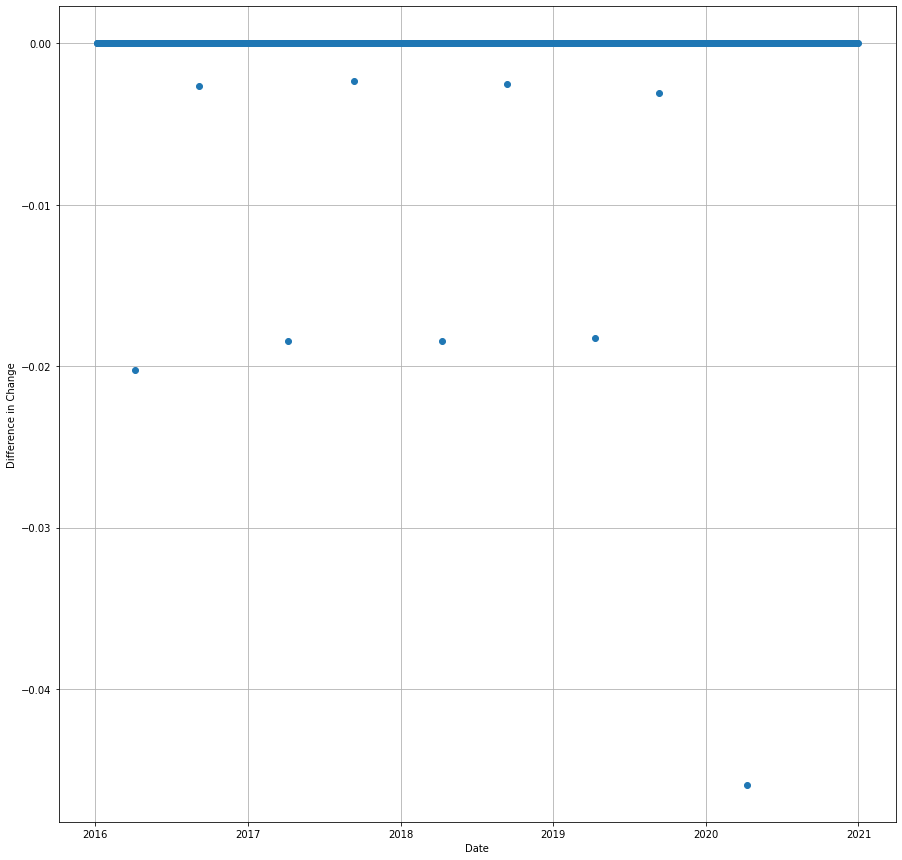

In [ ]:
adj_close = apple['Adj Close'] # adjusted close prices
pct_adj_close = adj_close.pct_change(1) # find daily percent changes 
close = apple['Close'] # close price
pct_close = close.pct_change(1) # find daily percent changes 
plt.figure(figsize=(15,15))
plt.plot(pct_close- pct_adj_close, "o")
plt.grid()
plt.xlabel("Date")
plt.ylabel("Difference in Change")

In [ ]:
delta = pct_close- pct_adj_close 
threshold = -0.001 # We pick threshold = -0.001 from the graph.
delta = delta[delta<threshold] # screen only the location where differences is less than -0.001
print("The dividens are paid out on:")
for date in delta.index:
  print(date.date())

The dividens are paid out on:
2016-04-05
2016-09-06
2017-04-07
2017-09-12
2018-04-11
2018-09-12
2019-04-11
2019-09-11
2020-04-09


In [ ]:
dividends =[]
for date in delta.index:
  k = np.nonzero(apple.index==date)[0][0] # find the row where dividends have been paid.
  close_before = close[k-1]
  pct_close_div = pct_close[k]
  pct_adj_div = pct_adj_close[k]
  dividend = close_before * ( pct_adj_div - pct_close_div)
  dividends.append(dividend)
dividends = pd.Series(dividends, index=delta.index)
print(dividends)

Date
2016-04-05    3.404239
2016-09-06    0.501332
2017-04-07    3.564471
2017-09-12    0.496475
2018-04-11    3.635660
2018-09-12    0.508629
2019-04-11    3.518457
2019-09-11    0.512129
2020-04-09    4.594241
dtype: float64


In [ ]:
yearly_dividends = []
for y in range(2016,2021): # Find dividens growth rate in the last 5 years.
  dividend_year = dividends[dividends.index.year == y] #filter only one year
  yearly_dividends.append(dividend_year.sum()) # find total dividens per year
yearly_dividends = pd.Series(yearly_dividends, index=np.arange(2016,2021))
dividend_growth = yearly_dividends.pct_change(1).dropna()
print("Yearly dividends: ")
print(yearly_dividends)
print("Dividend growth rate: ")
print(dividend_growth)
g = dividend_growth.median()
print(f"Dividends growth rate is {g*100} %.")

Yearly dividends: 
2016    3.905570
2017    4.060947
2018    4.144288
2019    4.030586
2020    4.594241
dtype: float64
Dividend growth rate: 
2017    0.039783
2018    0.020523
2019   -0.027436
2020    0.139845
dtype: float64
Dividends growth rate is 3.015296811474988 %.


In [ ]:
r = 0.1 # Assume that we can find the risk-free security at 10%
S_apple = yearly_dividends[2020]/(r - g) # D1/(r - g)
print(f"The current apple stock price is {adj_close.iloc[-1]}.") # 
print(f"From the Discounted Cash Flow model, Apple Stock price is {S_apple}.")

The current apple stock price is 113.0.
From the Discounted Cash Flow model, Apple Stock price is 65.77574900024526.


#CPALL

In [ ]:
import pandas as pd
import pandas_datareader as reader
import numpy as np
import matplotlib.pyplot as plt
apple = reader.DataReader("CPALL.bk", "yahoo","2016-01-01","2020-12-31") 
apple.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-01-04,40.00,39.00,39.25,39.00,15918200.0,34.827610
2016-01-05,40.50,39.25,39.50,40.25,26932400.0,35.943882
2016-01-06,41.75,40.50,40.50,41.00,26179400.0,36.613644
2016-01-07,41.00,40.00,40.00,40.00,18699800.0,35.720627
2016-01-08,41.75,40.00,40.25,41.50,20330700.0,37.060154


Text(0, 0.5, 'Difference in Change')

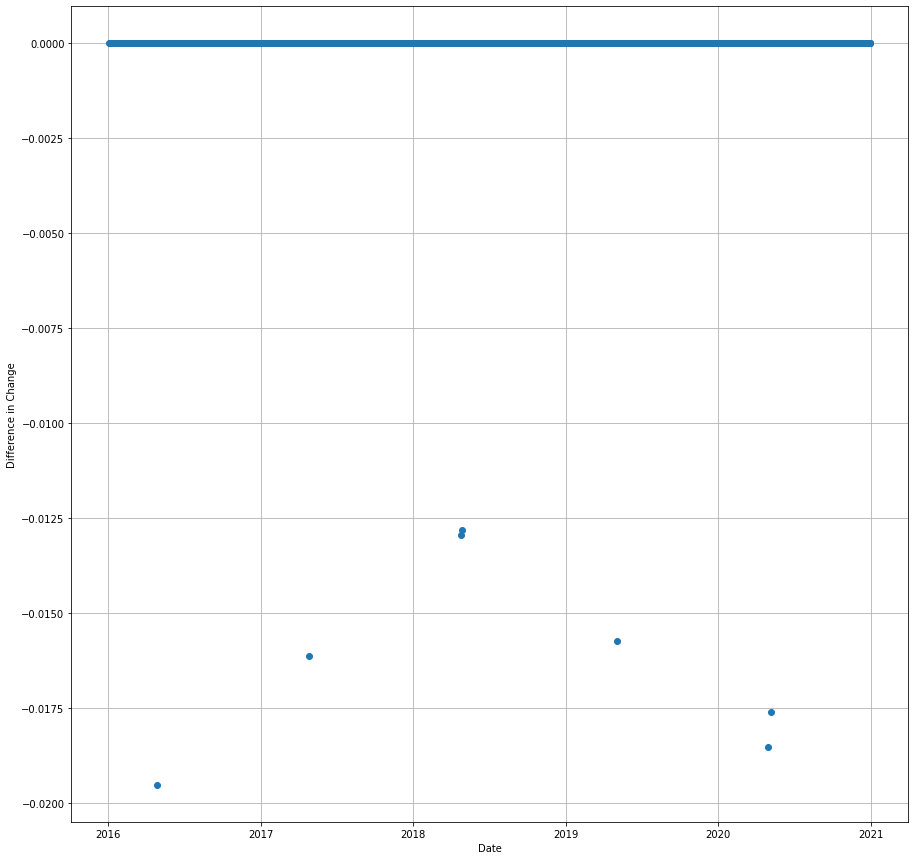

In [ ]:
adj_close = apple['Adj Close'] # adjusted close prices
pct_adj_close = adj_close.pct_change(1) # find daily percent changes 
close = apple['Close'] # close price
pct_close = close.pct_change(1) # find daily percent changes 
plt.figure(figsize=(15,15))
plt.plot(pct_close- pct_adj_close, "o")
plt.grid()
plt.xlabel("Date")
plt.ylabel("Difference in Change")

In [ ]:
delta = pct_close- pct_adj_close 
threshold = -0.001 # We pick threshold = -0.001 from the graph.
delta = delta[delta<threshold] # screen only the location where differences is less than -0.001
print("The dividens are paid out on:")
for date in delta.index:
  print(date.date())

The dividens are paid out on:
2016-04-28
2017-04-27
2018-04-25
2018-04-27
2019-05-03
2020-04-29
2020-05-05


In [ ]:
dividends =[]
for date in delta.index:
  k = np.nonzero(apple.index==date)[0][0] # find the row where dividends have been paid.
  close_before = close[k-1]
  pct_close_div = pct_close[k]
  pct_adj_div = pct_adj_close[k]
  dividend = close_before * ( pct_adj_div - pct_close_div)
  dividends.append(dividend)
dividends = pd.Series(dividends, index=delta.index)
print(dividends)

Date
2016-04-28    0.902987
2017-04-27    1.000004
2018-04-25    1.120607
2018-04-27    1.114084
2019-05-03    1.218866
2020-04-29    1.273144
2020-05-05    1.250000
dtype: float64


In [ ]:
yearly_dividends = []
for y in range(2016,2021): # Find dividens growth rate in the last 5 years.
  dividend_year = dividends[dividends.index.year == y] #filter only one year
  yearly_dividends.append(dividend_year.sum()) # find total dividens per year
yearly_dividends = pd.Series(yearly_dividends, index=np.arange(2016,2021))
dividend_growth = yearly_dividends.pct_change(1).dropna()
print("Yearly dividends: ")
print(yearly_dividends)
print("Dividend growth rate: ")
print(dividend_growth)
g = dividend_growth.median()
print(f"Dividends growth rate is {g*100} %.")

Yearly dividends: 
2016    0.902987
2017    1.000004
2018    2.234691
2019    1.218866
2020    2.523144
dtype: float64
Dividend growth rate: 
2017    0.107441
2018    1.234682
2019   -0.454571
2020    1.070075
dtype: float64
Dividends growth rate is 58.875796734727324 %.


In [ ]:
r = 0.1 # Assume that we can find the risk-free security at 10%
S_apple = yearly_dividends[2020]/(r - g) # D1/(r - g)
print(f"The current apple stock price is {adj_close.iloc[-1]}.") # 
print(f"From the Discounted Cash Flow model, Apple Stock price is {S_apple}.")

The current apple stock price is 58.25.
From the Discounted Cash Flow model, Apple Stock price is -5.162359207918569.


#ADVANC

In [ ]:
import pandas as pd
import pandas_datareader as reader
import numpy as np
import matplotlib.pyplot as plt
apple = reader.DataReader("ADVANC.bk", "yahoo","2016-01-01","2020-12-31") 
apple.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-01-04,149.5,141.0,149.0,143.0,24880200.0,115.078918
2016-01-05,144.5,131.0,144.0,131.0,59681500.0,105.421974
2016-01-06,139.0,128.0,128.5,137.5,59203500.0,110.652824
2016-01-07,138.0,131.5,133.0,134.5,32742400.0,108.238594
2016-01-08,144.0,135.0,137.0,144.0,26585900.0,115.883698


Text(0, 0.5, 'Difference in Change')

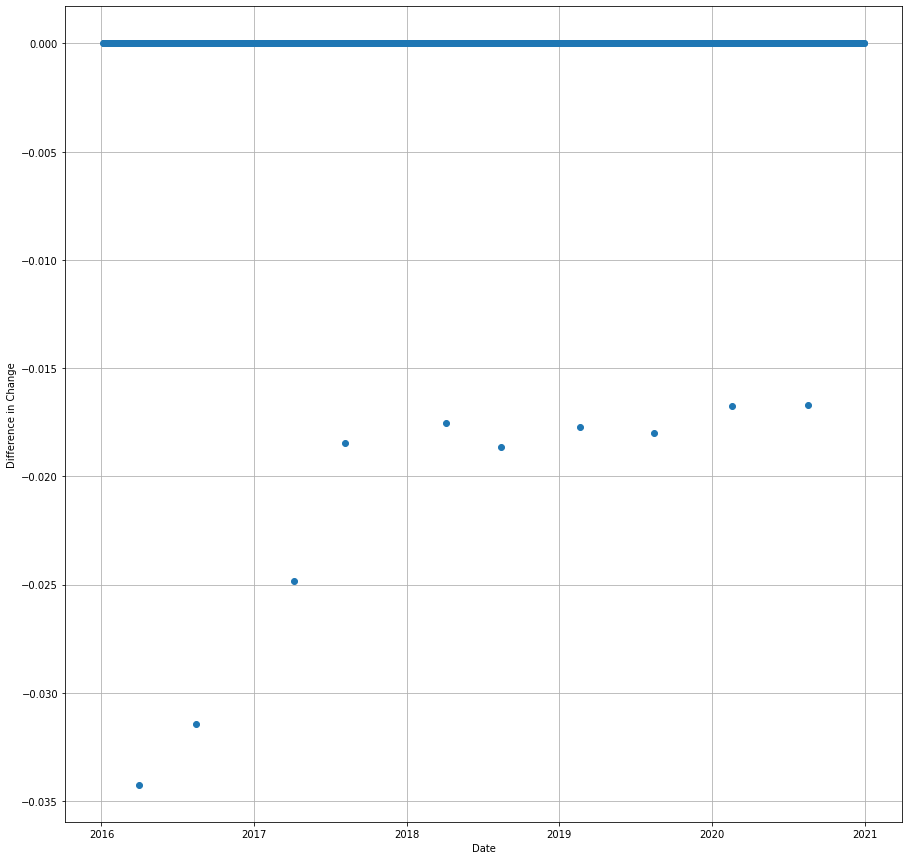

In [ ]:
adj_close = apple['Adj Close'] # adjusted close prices
pct_adj_close = adj_close.pct_change(1) # find daily percent changes 
close = apple['Close'] # close price
pct_close = close.pct_change(1) # find daily percent changes 
plt.figure(figsize=(15,15))
plt.plot(pct_close- pct_adj_close, "o")
plt.grid()
plt.xlabel("Date")
plt.ylabel("Difference in Change")

In [ ]:
delta = pct_close- pct_adj_close 
threshold = -0.001 # We pick threshold = -0.001 from the graph.
delta = delta[delta<threshold] # screen only the location where differences is less than -0.001
print("The dividens are paid out on:")
for date in delta.index:
  print(date.date())

The dividens are paid out on:
2016-03-31
2016-08-15
2017-04-05
2017-08-07
2018-04-05
2018-08-15
2019-02-20
2019-08-16
2020-02-19
2020-08-19


In [ ]:
dividends =[]
for date in delta.index:
  k = np.nonzero(apple.index==date)[0][0] # find the row where dividends have been paid.
  close_before = close[k-1]
  pct_close_div = pct_close[k]
  pct_adj_div = pct_adj_close[k]
  dividend = close_before * ( pct_adj_div - pct_close_div)
  dividends.append(dividend)
dividends = pd.Series(dividends, index=delta.index)
print(dividends)

Date
2016-03-31    6.471861
2016-08-15    5.799403
2017-04-05    4.322589
2017-08-07    3.472139
2018-04-05    3.544272
2018-08-15    3.727608
2019-02-20    3.250543
2019-08-16    3.882942
2020-02-19    3.569505
2020-08-19    3.209796
dtype: float64


In [ ]:
yearly_dividends = []
for y in range(2016,2021): # Find dividens growth rate in the last 5 years.
  dividend_year = dividends[dividends.index.year == y] #filter only one year
  yearly_dividends.append(dividend_year.sum()) # find total dividens per year
yearly_dividends = pd.Series(yearly_dividends, index=np.arange(2016,2021))
dividend_growth = yearly_dividends.pct_change(1).dropna()
print("Yearly dividends: ")
print(yearly_dividends)
print("Dividend growth rate: ")
print(dividend_growth)
g = dividend_growth.median()
print(f"Dividends growth rate is {g*100} %.")

Yearly dividends: 
2016    12.271264
2017     7.794728
2018     7.271880
2019     7.133484
2020     6.779301
dtype: float64
Dividend growth rate: 
2017   -0.364798
2018   -0.067077
2019   -0.019032
2020   -0.049651
dtype: float64
Dividends growth rate is -5.836396772718261 %.


In [ ]:
r = 0.1 # Assume that we can find the risk-free security at 10%
S_apple = yearly_dividends[2020]/(r - g) # D1/(r - g)
print(f"The current apple stock price is {adj_close.iloc[-1]}.") # 
print(f"From the Discounted Cash Flow model, Apple Stock price is {S_apple}.")

The current apple stock price is 176.0.
From the Discounted Cash Flow model, Apple Stock price is 42.808356107563114.
